In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso

#### Load Dataset

In [2]:
df = pd.read_csv('/mnt/e/Term 3/ML-2024/HW3/Admission.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Plotting the distribution of selected features to visualize their distribution across the dataset


Text(0.5, 1.0, 'SOP')

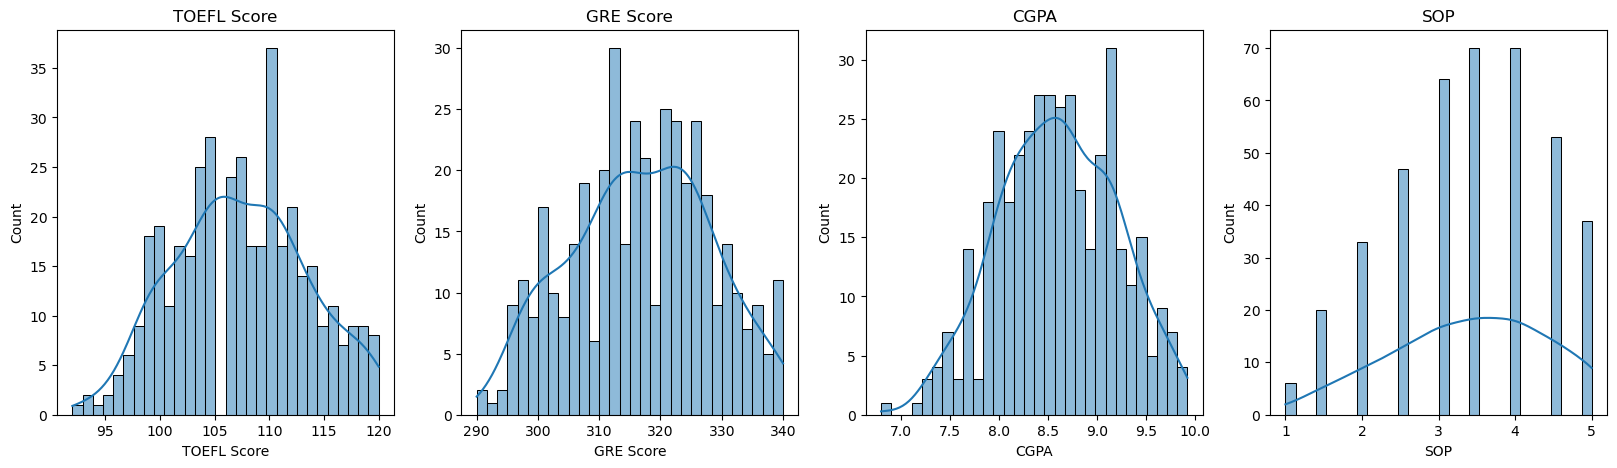

In [19]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
sns.histplot(data=df, x='TOEFL Score', bins=30, kde=True)
plt.title('TOEFL Score')

plt.subplot(1, 4, 2)
sns.histplot(data=df, x='GRE Score', bins=30, kde=True)
plt.title('GRE Score')

plt.subplot(1, 4, 3)
sns.histplot(data=df, x='CGPA', bins=30, kde=True)
plt.title('CGPA')

plt.subplot(1, 4, 4)
sns.histplot(data=df, x='SOP', bins=30, kde=True)
plt.title('SOP')

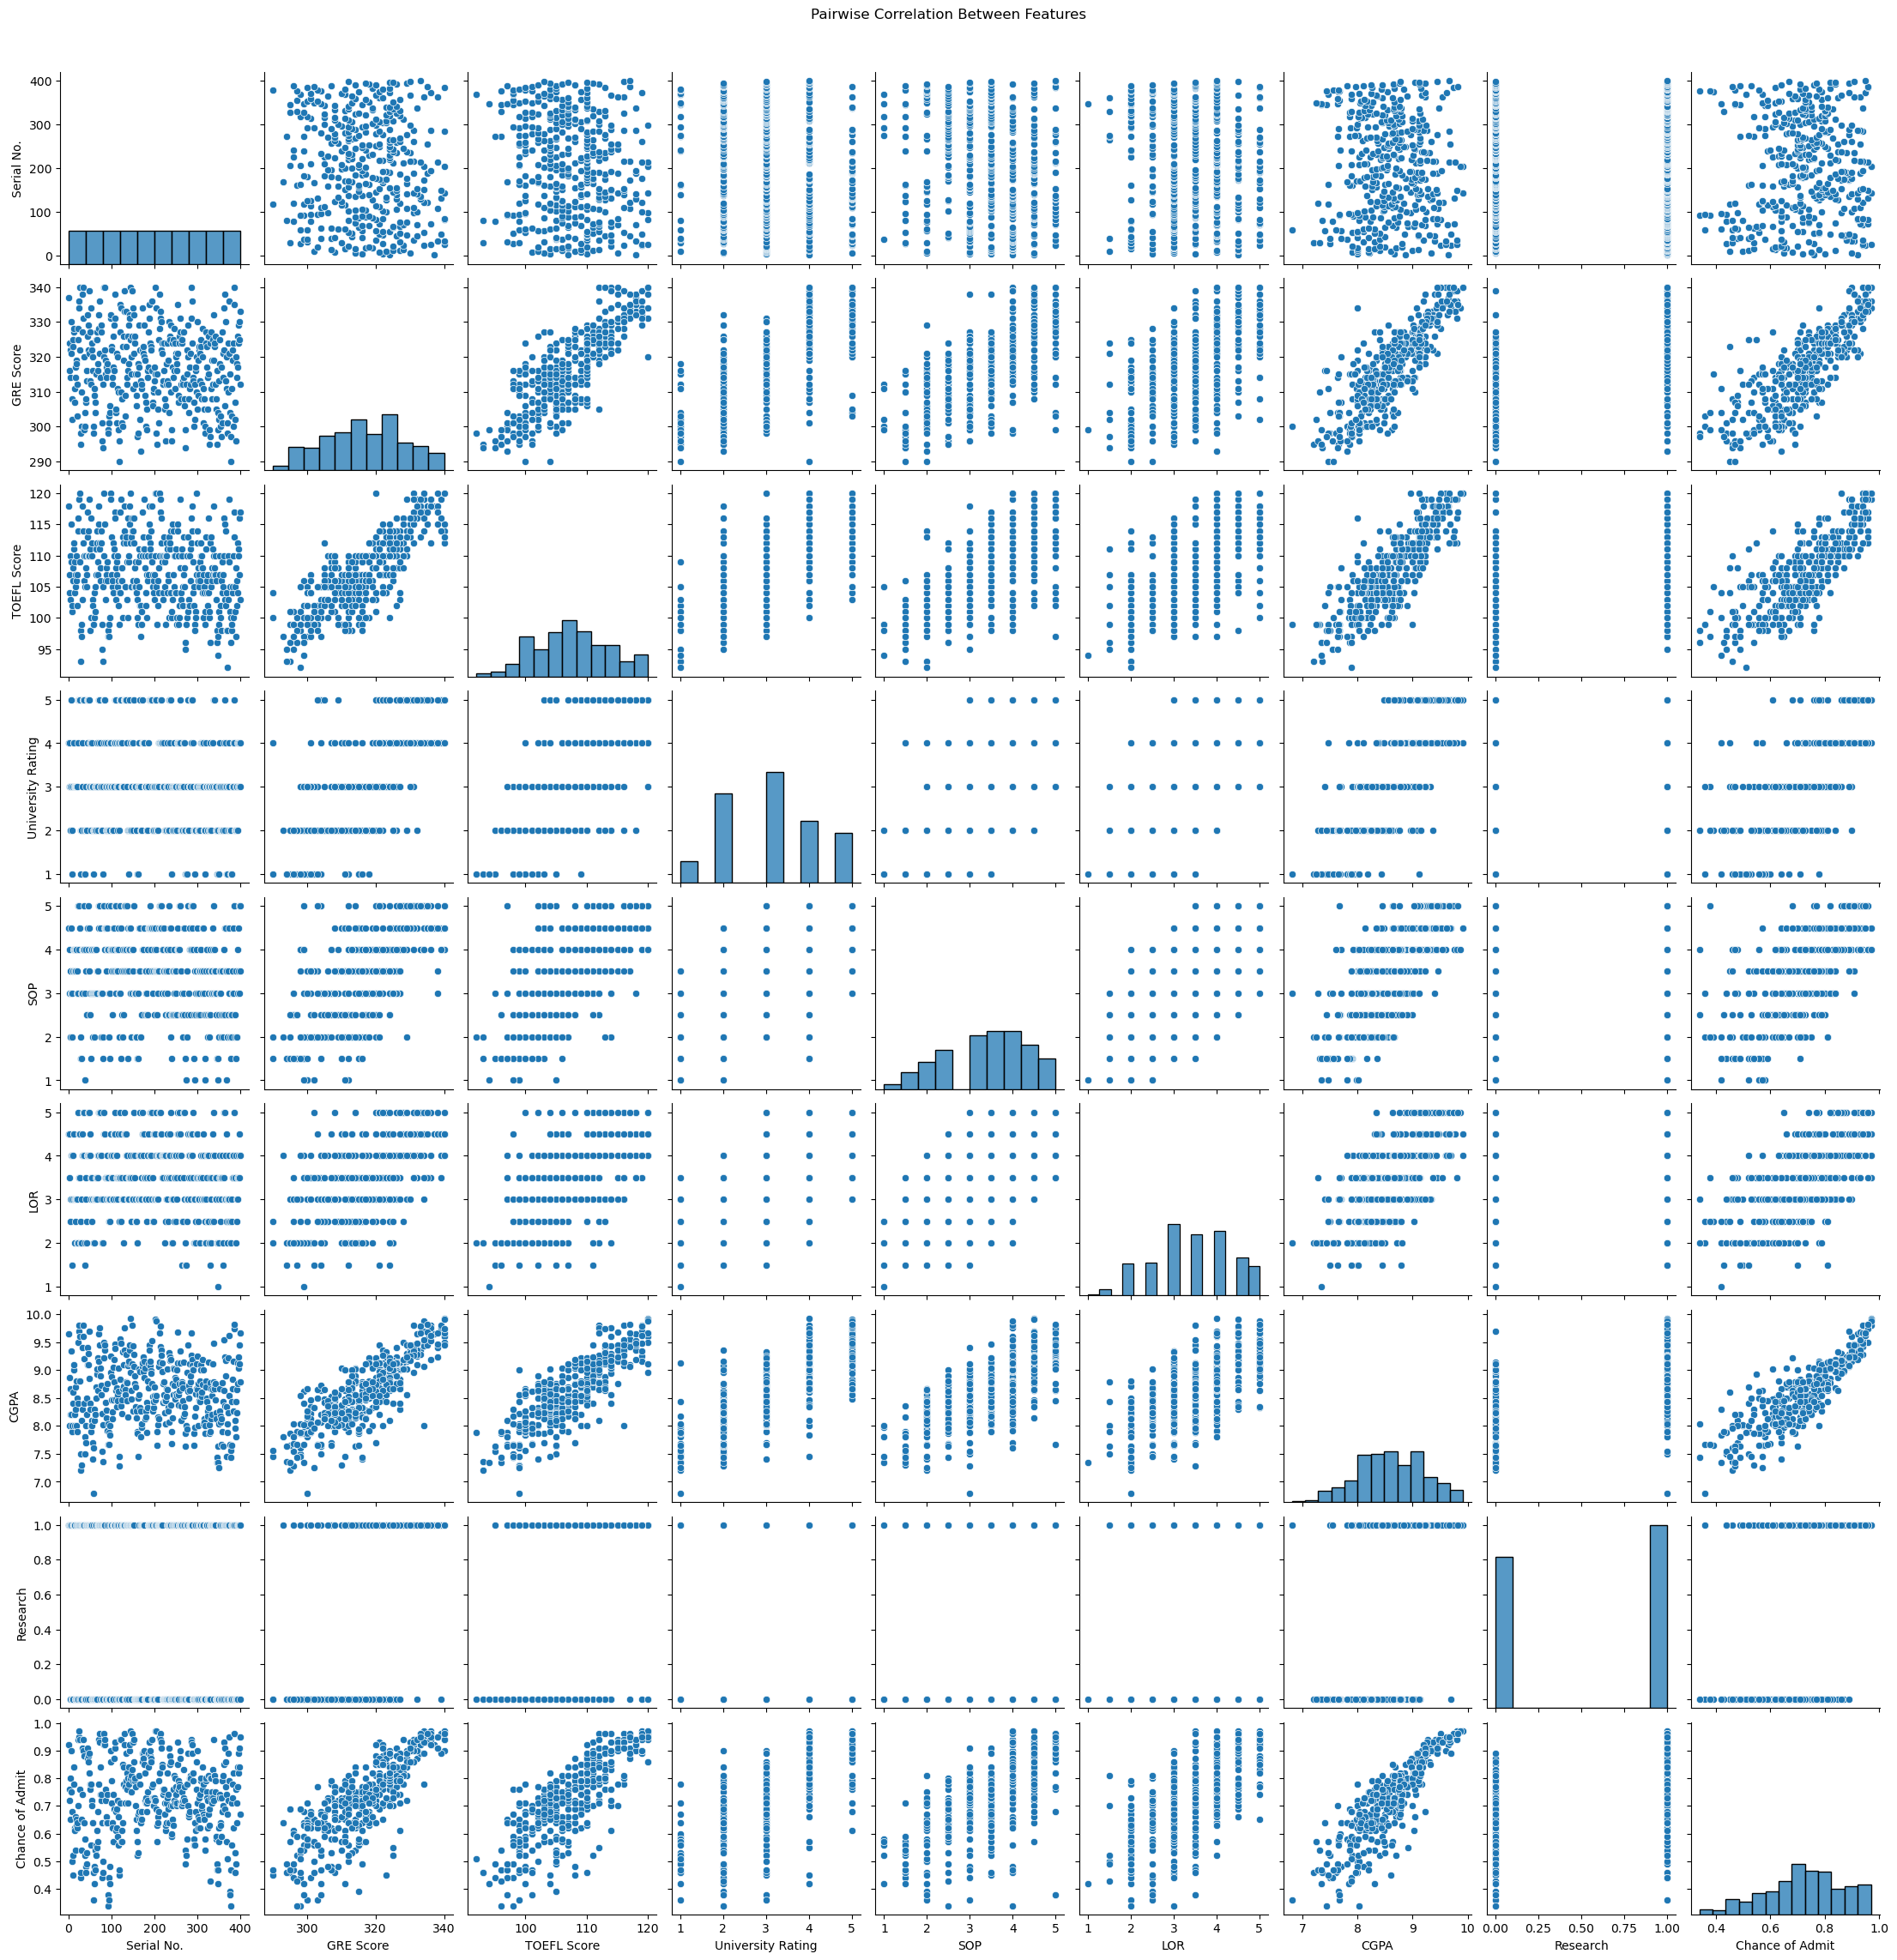

In [20]:
sns.pairplot(data=df)
plt.suptitle("Pairwise Correlation Between Features", y=1.02)
plt.show()

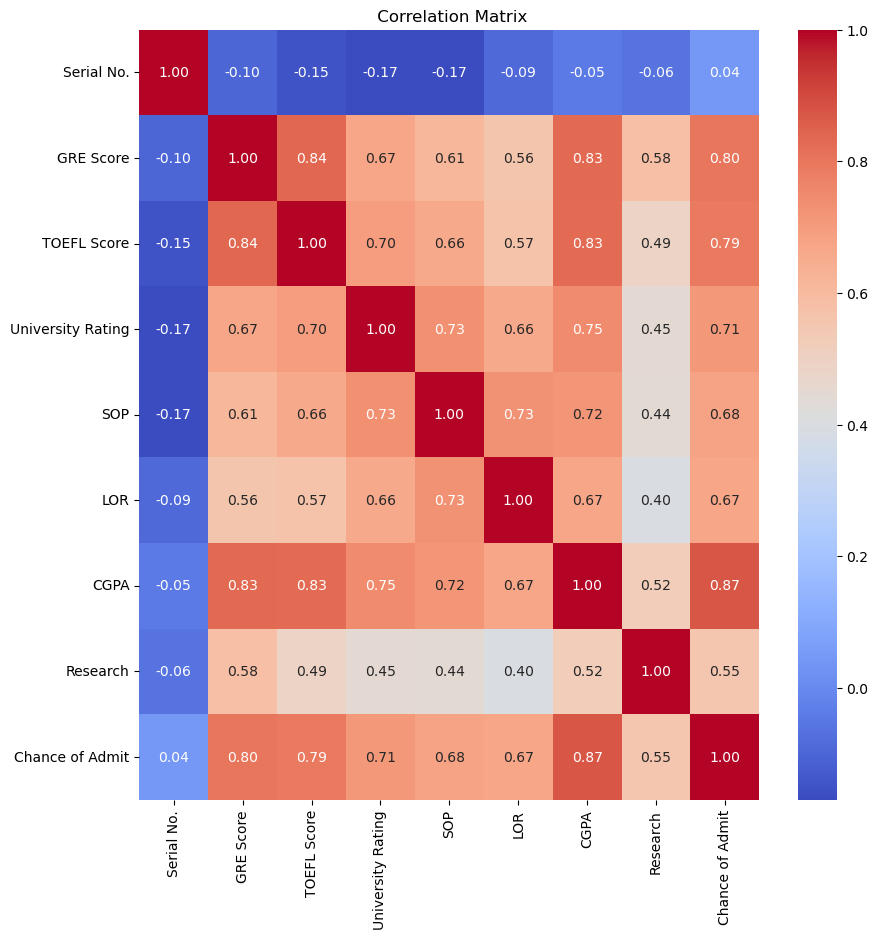

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [81]:
# Unstacking the correlation matrix to convert it into a Series of pairwise correlations
corr_matrix = correlation_matrix.unstack()
sorted_corr = corr_matrix.sort_values(ascending=False)
highest_corr = sorted_corr[sorted_corr != 1.0].drop_duplicates()
print(highest_corr.head(10))

CGPA               Chance of Admit      0.873289
GRE Score          TOEFL Score          0.835977
                   CGPA                 0.833060
TOEFL Score        CGPA                 0.828417
GRE Score          Chance of Admit      0.802610
Chance of Admit    TOEFL Score          0.791594
University Rating  CGPA                 0.746479
SOP                University Rating    0.734523
                   LOR                  0.729593
                   CGPA                 0.718144
dtype: float64


In [40]:
print(highest_corr.tail(10))

Research           SOP            0.444029
LOR                Research       0.396859
Chance of Admit    Serial No.     0.042336
Serial No.         CGPA          -0.045608
Research           Serial No.    -0.063138
Serial No.         LOR           -0.088221
GRE Score          Serial No.    -0.097526
Serial No.         TOEFL Score   -0.147932
                   SOP           -0.166932
University Rating  Serial No.    -0.169948
dtype: float64


## 

### Applying linear regression to model the relationship between the selected features and the target variable


#### Preprocessing: Drop missing values if any

In [44]:
df = df.dropna()
X = df.drop(['Serial No.', 'GRE Score'], axis=1)
y = df['GRE Score']

In [47]:
X.columns

Index(['TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research',
       'Chance of Admit'],
      dtype='object')

In [48]:
X

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,118,4,4.5,4.5,9.65,1,0.92
1,107,4,4.0,4.5,8.87,1,0.76
2,104,3,3.0,3.5,8.00,1,0.72
3,110,3,3.5,2.5,8.67,1,0.80
4,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...
395,110,3,3.5,3.5,9.04,1,0.82
396,107,3,3.0,3.5,9.11,1,0.84
397,116,4,5.0,4.5,9.45,1,0.91
398,103,3,3.5,4.0,8.78,0,0.67


In [49]:
y

0      337
1      324
2      316
3      322
4      314
      ... 
395    324
396    325
397    330
398    312
399    333
Name: GRE Score, Length: 400, dtype: int64

In [62]:
y = df['GRE Score'].values

In [63]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add a column of ones for the bias term (intercept w0)
X_scaled = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))

In [64]:
# Split the data into training and testing sets (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(320, 8) (320,)
(80, 8) (80,)


In [65]:
# Closed-form linear regression: w = (XᵗX)⁻¹ Xᵗy
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

In [66]:
# Make predictions on both training and testing sets
y_pred_train = X_train @ w
y_pred_test = X_test @ w

In [67]:
# Calculate Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

In [68]:
print("🔵 MSE on training data:", round(mse_train, 2))
print("🟠 MSE on testing data:", round(mse_test, 2))

🔵 MSE on training data: 26.99
🟠 MSE on testing data: 31.94


Solving Linear Regression with direct solution has its own pros and cons:

Pros:
- It's optimal.
- The implementation is simple.

Cons:
- High Computational Cost for High Dimensional data due to the calculation of inverse
- Inverse of the matrix may not exist due to the Multicollinearity of features.

Gradient Descent is a more practical solution because:
- It is more scalable.
- It has lower computational cost.

#### Apply Linear Regression with two different regularization techniques:

- Ridge Regression (L2 regularization)

- Lasso Regression (L1 regularization)

In [71]:
# Train Ridge model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)
w_ridge = ridge_model.coef_


In [72]:
# Train Lasso model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
w_lasso = lasso_model.coef_

In [80]:
# Compare coefficients
feature_names = X.columns
print("Linear Regression (MLE) without regularization:")
for name, coef in zip(feature_names, w):
    print(f"{name}: {coef:.4f}")

feature_names = X.columns
print("\nRidge Coefficients:")
for name, coef in zip(feature_names, w_ridge):
    print(f"{name}: {coef:.4f}")

print("\nLasso Coefficients:")
for name, coef in zip(feature_names, w_lasso):
    print(f"{name}: {coef:.4f}")

Linear Regression (MLE) without regularization:
TOEFL Score: 316.9115
University Rating: 4.1220
SOP: 0.1627
LOR: -0.5456
CGPA: -0.3558
Research: 4.1495
Chance of Admit: 1.8018

Ridge Coefficients:
TOEFL Score: 0.0000
University Rating: 4.1203
SOP: 0.1641
LOR: -0.5441
CGPA: -0.3553
Research: 4.1454
Chance of Admit: 1.8016

Lasso Coefficients:
TOEFL Score: 0.0000
University Rating: 4.0919
SOP: 0.0000
LOR: -0.2180
CGPA: -0.1442
Research: 3.9450
Chance of Admit: 1.7314


Linear Regression (MLE):
- No regularization is applied.

- The coefficient for TOEFL Score (316.91) is abnormally large.

- This suggests issues like multicollinearity or lack of feature scaling.

- Other coefficients are reasonable but potentially unstable.

Ridge Regression:
- All features are retained.

- Coefficients are slightly reduced compared to MLE.

- This is expected: Ridge (L2 regularization) shrinks weights but doesn’t eliminate any.

Lasso Regression:
- Coefficients for TOEFL Score and SOP are exactly 0.

- This means Lasso has eliminated those features, identifying them as less important.

- Remaining coefficients are also smaller compared to Ridge.

